#### Patrick Brockmann
LSCE - 20 October 2024

- Explore linear interpolation https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
- Explore Piecewise Cubic Hermite Interpolating Polynomial (PCHIPS) https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.PchipInterpolator.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import matplotlib.ticker as ticker
import pandas as pd

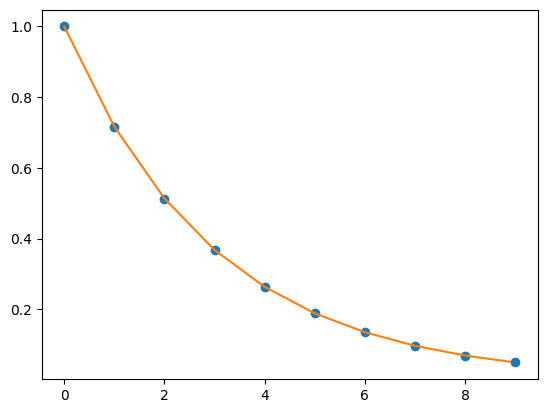

In [2]:
x = np.arange(0, 10)
y = np.exp(-x/3.0)
f = interpolate.interp1d(x, y, fill_value="extrapolate")

xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`

plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

In [3]:
f(10)

array(0.03009069)

In [4]:
file = 'testFile.csv'
df = pd.read_csv(file)
df

,Time (ka),Stack Benthic d18O (per mil),Standard error (per mil),depthODP849cm,d18Oforams-b,d13Cforams-b,depthODP846,d18Oforams-b.1,d13Cforams-b.1,depth,18MD00-2374vsPDB,13MD00-2374vsPDB,depth.1,18MD00-2374vsPDB-pl,13MD00-2374vsPDB-pl
0,0,2.588,0.031,7,3.66,0.21,12,3.380,0.140,100,3.235,0.515,0,2.789188,0.125897
1,1,2.588,0.037,17,3.49,0.08,23,3.460,0.010,104,3.490,0.700,4,2.791426,-0.077340
2,2,2.539,0.031,28,3.31,0.19,33,3.765,-0.080,108,3.535,0.615,8,2.773870,0.199461
3,3,2.646,0.027,45,4.17,-0.15,43,4.140,-0.170,112,3.605,0.750,12,2.719798,0.455767
4,4,2.655,0.033,55,4.69,-0.27,53,4.470,-0.210,116,3.655,0.775,16,2.697243,0.467349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,379,3.533,0.046,3908,4.27,-0.28,3638,4.000,-0.420,3252,2.470,0.660,2932,3.229425,-0.508857
380,380,3.554,0.045,3915,4.18,-0.38,3648,3.805,-0.290,3256,2.480,0.710,2936,3.308213,-0.508921
381,381,3.512,0.029,3918,4.16,-0.34,3657,3.960,-0.370,3284,2.230,0.480,2940,3.381772,-0.401312
382,382,3.409,0.058,3922,4.06,-0.29,3667,4.085,-0.375,3288,3.160,0.160,2944,3.205690,-0.196042


In [5]:
x1Name = 'Time (ka)'
y1Name = 'Stack Benthic d18O (per mil)'
x2Name = 'depthODP849cm'
y2Name = 'd18Oforams-b'

x1 = df[x1Name].to_numpy()
y1 = df[y1Name].to_numpy()
x2 = df[x2Name].to_numpy()
y2 = df[y2Name].to_numpy()

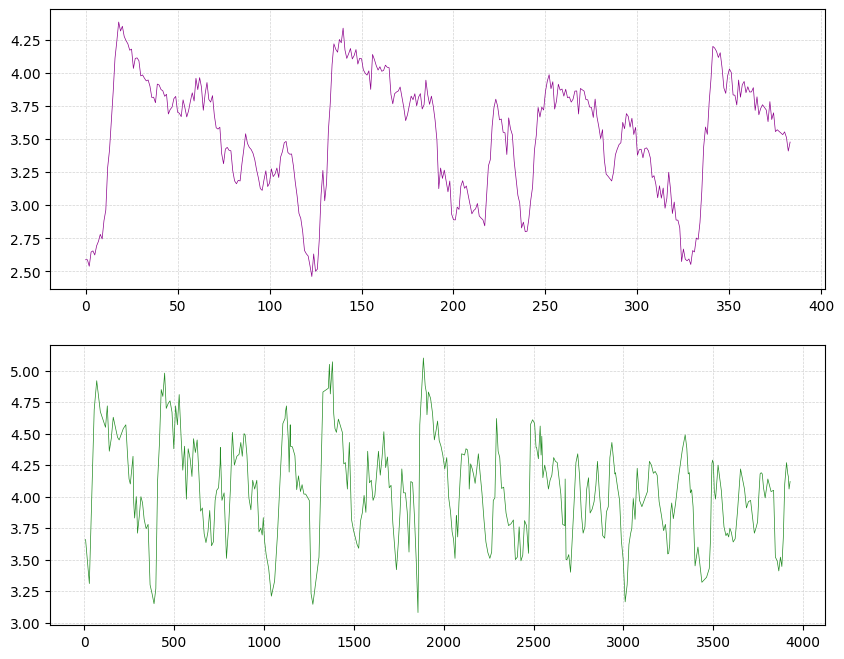

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(10,8))

axs[0].plot(x1, y1, c='darkmagenta', lw=0.5)
axs[0].grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)

axs[1].plot(x2, y2, c='forestgreen', lw=0.5)
axs[1].grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)

plt.show()

In [7]:
df = pd.read_csv('pointers2.csv', names=['coordsX1','coordsX2'])

print(df)

coordsX1 = df['coordsX1']
coordsX2 = df['coordsX2']

kind = 'linear'
f_1to2 = interpolate.interp1d(coordsX1, coordsX2, kind=kind, fill_value="extrapolate")
f_2to1 = interpolate.interp1d(coordsX2, coordsX1, kind=kind, fill_value="extrapolate")

#kind = 'quadratic'
#g_1to2 = interpolate.interp1d(coordsX1, coordsX2, kind=kind, fill_value="extrapolate")
#g_2to1 = interpolate.interp1d(coordsX2, coordsX1, kind=kind, fill_value="extrapolate")

g_1to2 = interpolate.PchipInterpolator(coordsX1, coordsX2, extrapolate=True)
g_2to1 = interpolate.PchipInterpolator(coordsX2, coordsX1, extrapolate=True)

      coordsX1     coordsX2
0    13.181947    42.189609
1    70.394752   241.184634
2   131.600145   406.630579
3   191.157883   641.524782
4   209.053322   704.746443
5   218.637378   725.974319
6   234.572908   783.699038
7   243.595839   811.653170
8   281.926131   912.560277
9   287.661213   930.637025
10  322.817641  1024.202843
11  335.659767  1082.863678
12  381.557270  1253.371388


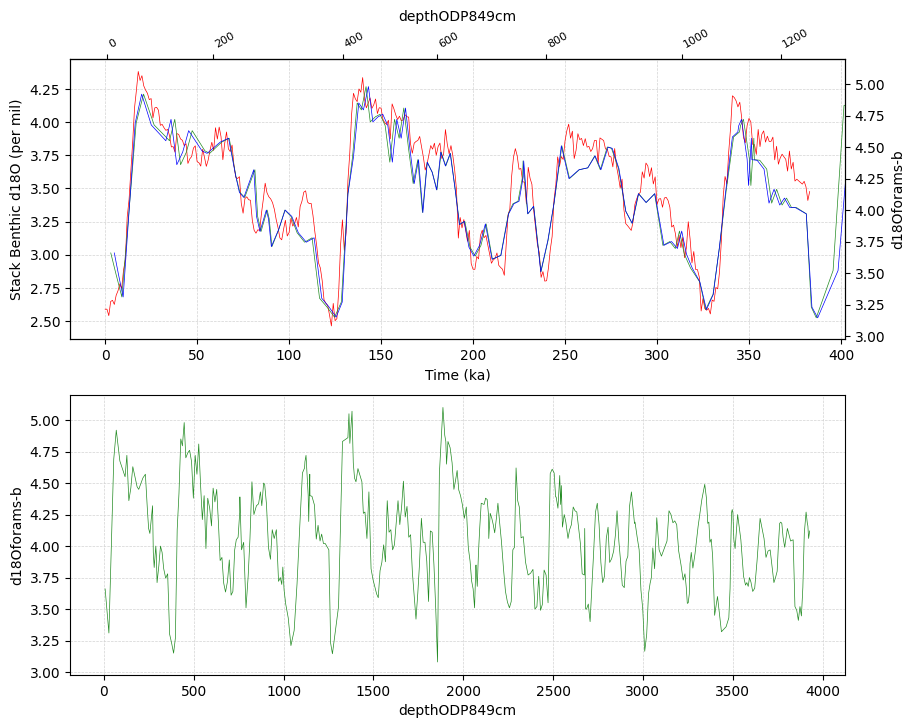

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(10,8))

axs[0].plot(x1, y1, c='red', lw=0.5)
axs[0].grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)
axs[0].set_xlabel(x1Name)
axs[0].set_ylabel(y1Name)
xlim = axs[0].get_xlim()

axs[1].plot(x2, y2, c='forestgreen', lw=0.5)
axs[1].grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)
axs[1].set_xlabel(x2Name)
axs[1].set_ylabel(y2Name)

axsInterp = axs[0].twinx()
axsInterp.set_ylabel(y2Name)
axsInterp.plot(f_2to1(x2), y2, c='forestgreen', lw=0.5)
second_xaxis = axsInterp.secondary_xaxis('top', functions=(f_1to2, f_2to1))
second_xaxis.tick_params(labelrotation=30, labelsize=8)
second_xaxis.set_xlabel(x2Name)
plt.setp(second_xaxis.get_xticklabels(), horizontalalignment='left')
axsInterp.set_xlim(xlim)

axsInterp.plot(g_2to1(x2), y2, c='blue', lw=0.5)

plt.show()

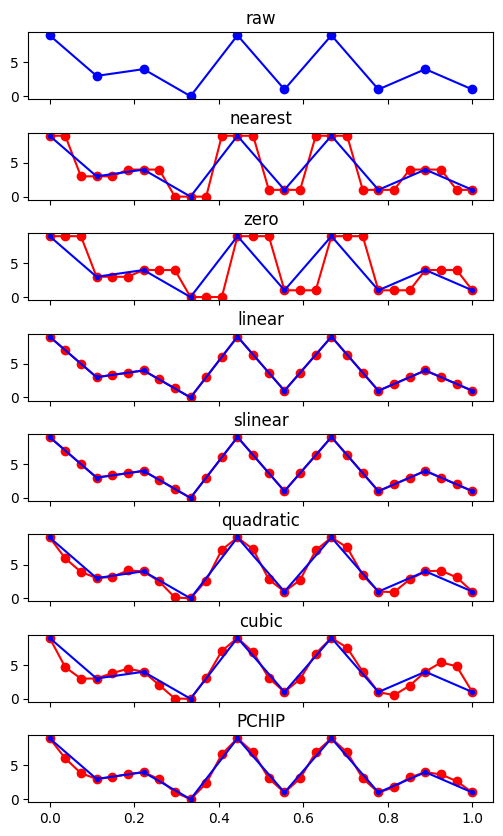

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate

np.random.seed(6)
kinds = ('nearest', 'zero', 'linear', 'slinear', 'quadratic', 'cubic')

N = 10
x = np.linspace(0, 1, N)
y = np.random.randint(10, size=(N,))

new_x = np.linspace(0, 1, 28)
fig, axs = plt.subplots(nrows=len(kinds)+2, sharex=True, figsize=(6,10))
axs[0].plot(x, y, 'bo-')
axs[0].set_title('raw')
for ax, kind in zip(axs[1:-1], kinds):
    new_y = interpolate.interp1d(x, y, kind=kind)(new_x)
    ax.plot(new_x, new_y, 'ro-')
    ax.plot(x, y, 'b.-')
    plt.subplots_adjust(hspace=0.5)
    ax.set_title(kind)

new_y = interpolate.PchipInterpolator(x, y, extrapolate=True)(new_x)
axs[-1].plot(new_x, new_y, 'ro-')
axs[-1].plot(x, y, 'b.-')
plt.subplots_adjust(hspace=0.5)
axs[-1].set_title("PCHIP")

plt.show()

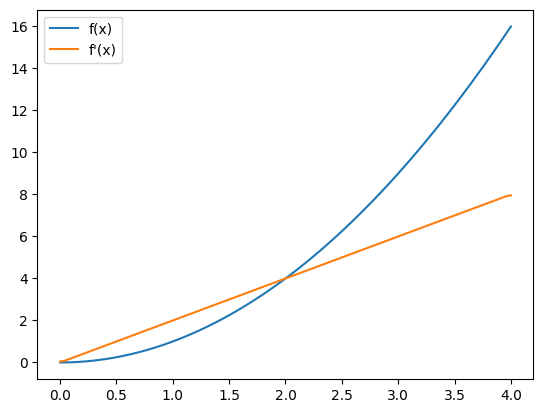

In [10]:
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return np.power(x, 2)
x = np.linspace(0, 4, 100)
y = f(x)
dy = np.gradient(y, x)
plt.plot(x, y, label='f(x)')
plt.plot(x, dy, label="f'(x)")
plt.legend()
plt.show()

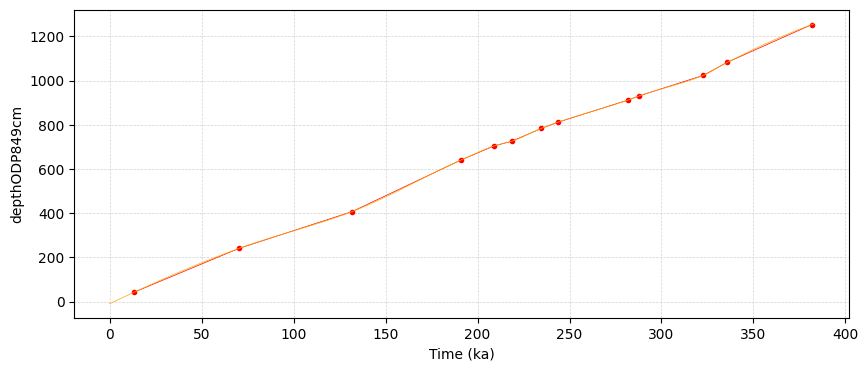

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(10,4))

axs.plot(coordsX1, coordsX2, '.-', c='red', lw=0.5)
axs.plot(x1, g_1to2(x1), c='orange', lw=0.5)
axs.grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)
axs.set_xlabel(x1Name)
axs.set_ylabel(x2Name)   

plt.show()

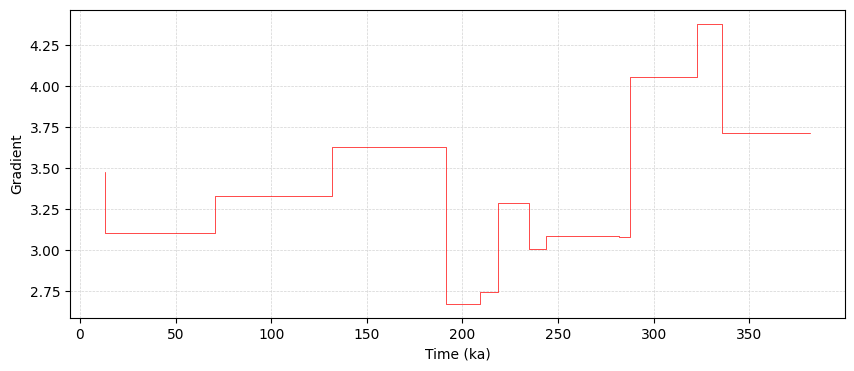

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(10,4))

gradient = np.gradient(coordsX2, coordsX1)

axs.step(coordsX1, gradient, c='red', lw=0.5)
axs.grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)
axs.set_xlabel(x1Name)
axs.set_ylabel("Gradient")

plt.show()

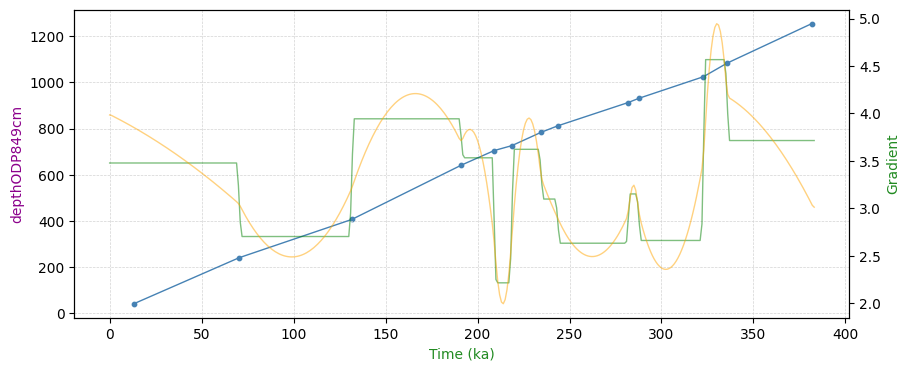

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))

ax.plot(coordsX1, coordsX2, color='steelblue', lw=1)
ax.scatter(coordsX1, coordsX2, s=10, marker='o', color='steelblue')
ax.grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel(x1Name, color='forestgreen')
ax.set_ylabel(x2Name, color='darkmagenta')

kind = 'linear'
f_1to2 = interpolate.interp1d(coordsX1, coordsX2, kind=kind, fill_value="extrapolate")
f_2to1 = interpolate.interp1d(coordsX2, coordsX1, kind=kind, fill_value="extrapolate")

g_1to2 = interpolate.PchipInterpolator(coordsX1, coordsX2, extrapolate=True)
g_2to1 = interpolate.PchipInterpolator(coordsX2, coordsX1, extrapolate=True)

gradient1 = np.gradient(coordsX2, coordsX1)
gradient2 = np.gradient(f_1to2(x1), x1).astype(np.float32)  # to avoid unnecessary precision
gradient3 = np.gradient(g_1to2(x1), x1).astype(np.float32)  # to avoid unnecessary precision

axGradient= ax.twinx()
axGradient.set_ylabel('Gradient', color='forestgreen')
#axGradient.step(coordsX1, gradient1, color='darkorange', lw=1, where='pre')
axGradient.plot(x1, gradient2, color='green', lw=1, alpha=0.5)
axGradient.plot(x1, gradient3, color='orange', lw=1, alpha=0.5)

plt.show()